<a href="https://colab.research.google.com/github/eclipse1228/ML_lib/blob/main/Titinic_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Titanic

## Linear Regression

1. 데이터 탐색 (EDA: Exploratory Data Analysis)
- 데이터의 기본 통계량 확인
- 결측치 확인
- 변수간 상관관계 분석
- 시각화를 통한 데이터 분포 확인
2. 데이터 전처리
- 결측치 처리
- 범주형 변수 인코딩
- 스케일링 (필요시)
3. 특성 선택 및 엔지니어링
- 중요 특성 선택
- 새로운 특성 생성
4. 모델 훈련
- 데이터 분할 (학습/검증)
- 선형 회귀 모델 훈련
5. 모델 평가 및 개선
- 모델 성능 평가
- 하이퍼파라미터 튜닝
- 다른 모델과 비교

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

read_train = pd.read_csv("train.csv")
read_test = pd.read_csv('test.csv')

read_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
# test
read_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [28]:
# print(read_train['Embarked'])
# Embarked 의 종류를 알고 싶다.
print(read_train['Embarked'].unique())

['S' 'C' 'Q' nan]


# 1. 데이터 탐색

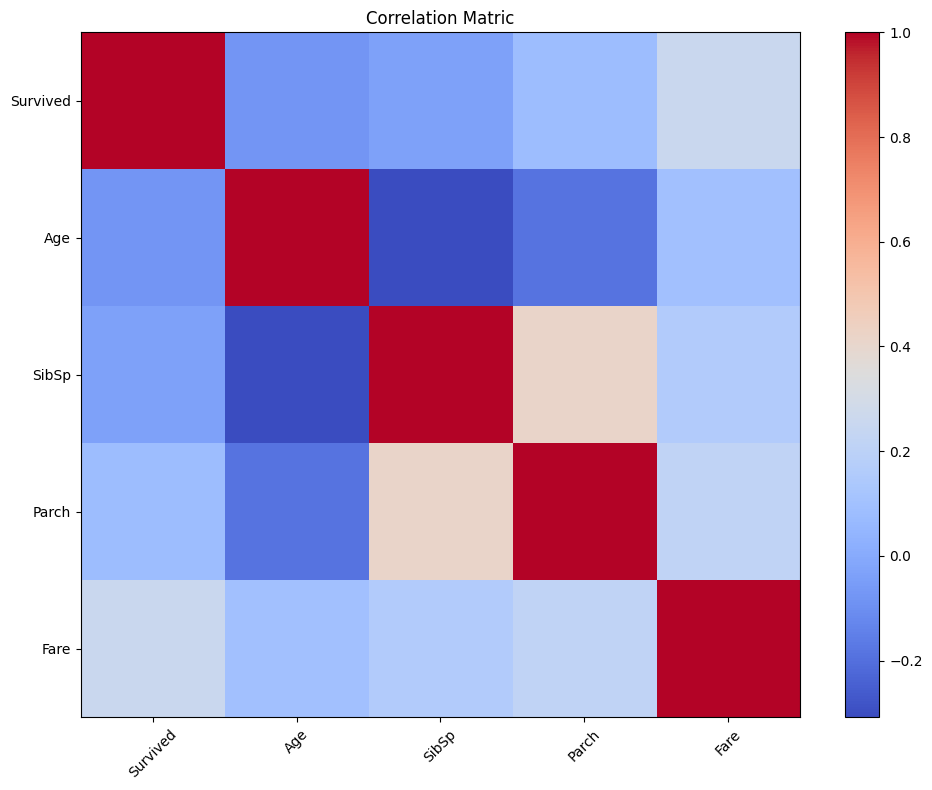

In [29]:
# 수치형 변수들의 상관관계 확인
numeric_features = ['Age', 'SibSp','Parch','Fare']
correlation_matrix = read_train[['Survived'] + numeric_features].corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto') # cmap은 색상 맵을 의미, aspect는 축의 비율을 의미
plt.colorbar() # 색상 맵의 강도를 나타내는 색상 바를 추가
plt.xticks(range(len(correlation_matrix.columns)),correlation_matrix.columns, rotation=45) # 축의 레이블을 설정하고 회전
plt.yticks(range(len(correlation_matrix.columns)),correlation_matrix.columns) # 축의 레이블을 설정
plt.title('Correlation Matric')
plt.tight_layout() # 그래프의 레이아웃을 조정
plt.show()

Text(0.5, 1.0, 'Age Distrib')

<Figure size 1000x600 with 0 Axes>

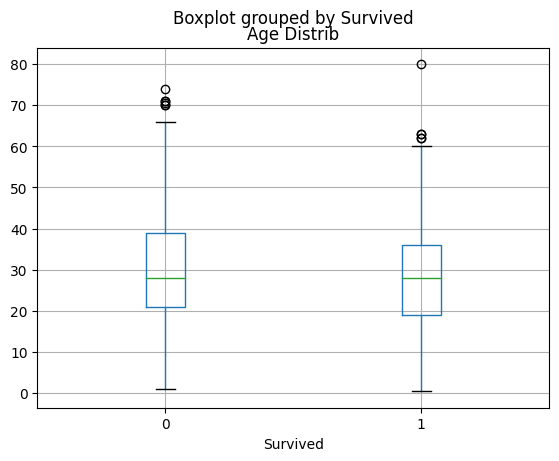

In [30]:
# 생존 여부에 따른 나이 분포
plt.figure(figsize= (10,6))
read_train.boxplot(column='Age',by='Survived')
plt.title('Age Distrib')

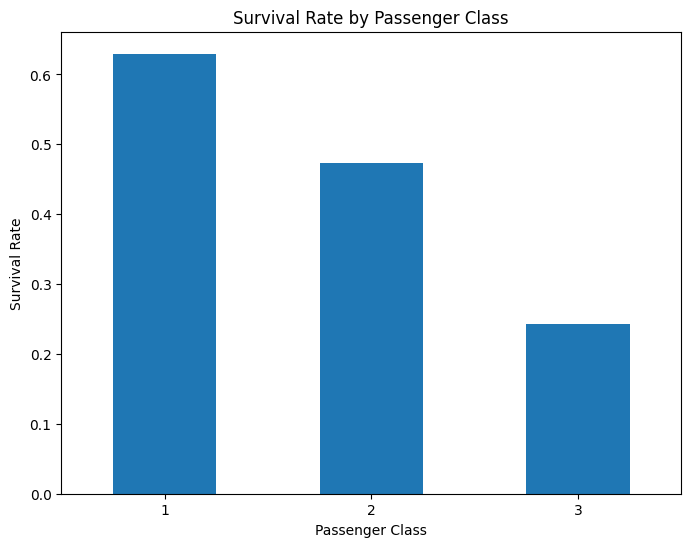

In [31]:
# 등급별 생존률
survival_rate = read_train.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(8,6))
survival_rate.plot(kind='bar') #
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

# 2. 데이터 전처리
## 결측치
Age, Cabin,Embarked 에 NAN 있음. (.unique()를 통해 알 수 있음.)
## 범주형 변수 인코딩
Sex, Embarked 를 수치형으로 변환.
(남자는 1 , 여자는 0) (Embarked 도 0(S) 1(Q) 2(Nan) 로 변환)
## 불필요한 특성 제거
Name, Ticket, Cabin

In [32]:
print("read_train columns:", read_train.columns.tolist())


read_train columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [37]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 특성 분류
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# 전처리 파이프라인
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 'Survived' 열 분리
y = read_train['Survived']
X = read_train.drop('Survived', axis=1)

# 훈련 데이터와 검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 전처리 적용
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)

# 특성 이름 가져오기
feature_names = (numeric_features +
                 preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features).tolist())

# 전처리된 데이터를 DataFrame으로 변환
X_train_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)
X_val_df = pd.DataFrame(X_val_preprocessed, columns=feature_names)


# 모델 훈련

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train_df, y_train)

# 검증 데이터로 예측
y_pred = model.predict(X_val_df)

# 모델 평가
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.13736790623207168
R-squared Score: 0.4335385992816204


In [40]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 로드
test_data = pd.read_csv('test.csv')

# 특성 분류
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# 전처리 파이프라인
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 전체 훈련 데이터로 모델 재훈련
X = read_train.drop('Survived', axis=1)
y = read_train['Survived']

# 전처리 및 모델 훈련
X_preprocessed = preprocessor.fit_transform(X)
model = LogisticRegression()
model.fit(X_preprocessed, y)

# 테스트 데이터 전처리
X_test_preprocessed = preprocessor.transform(test_data)

# 예측
y_pred = model.predict(X_test_preprocessed)

# 결과를 데이터프레임으로 만들기
results = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_pred
})

# CSV 파일로 저장
results.to_csv('submission.csv', index=False)

print("예측 완료. 결과가 'submission.csv' 파일로 저장되었습니다.")

예측 완료. 결과가 'submission.csv' 파일로 저장되었습니다.
